<a href="https://colab.research.google.com/github/Anindya-Paul07/colab_notebook_machine/blob/main/fcc_MAGIC_tryout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [5]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym","fM3Long","fM3Trans","fAlpha","fDist","class" ]

df = pd.read_csv("magic04.data", names=cols)
df.head(6)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
5   3.6130  238.0980     g

In [9]:
df["class"] = (df['class'] == 'g').astype(int)

In [10]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

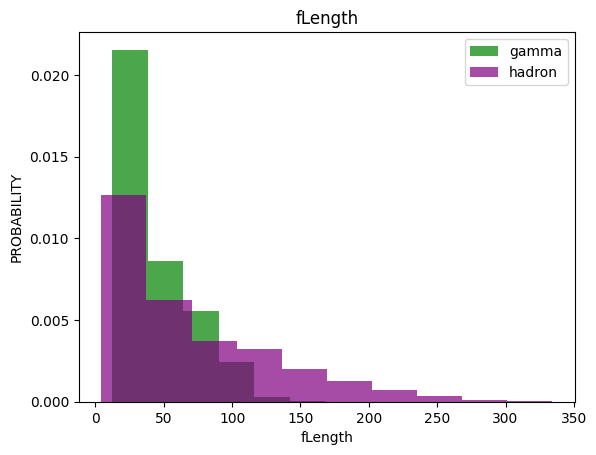

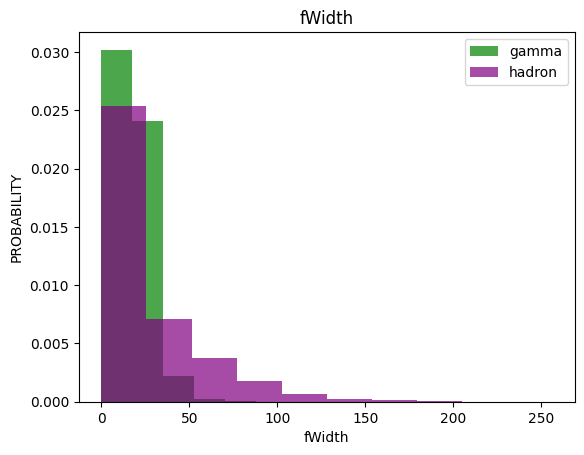

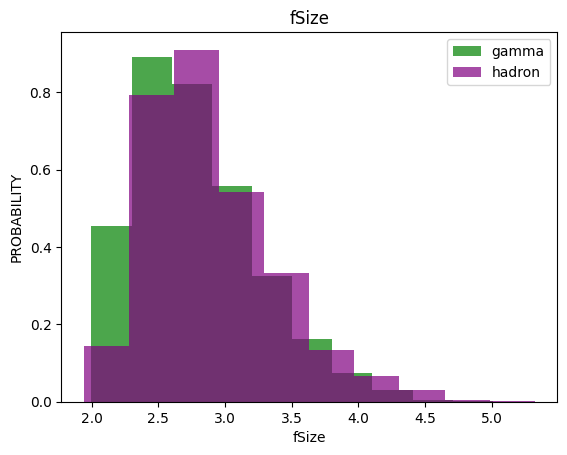

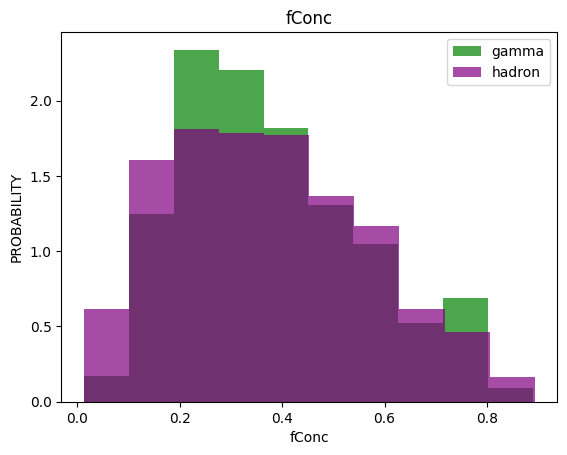

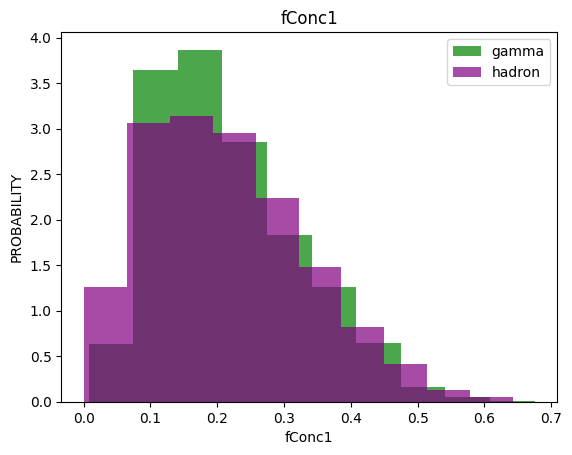

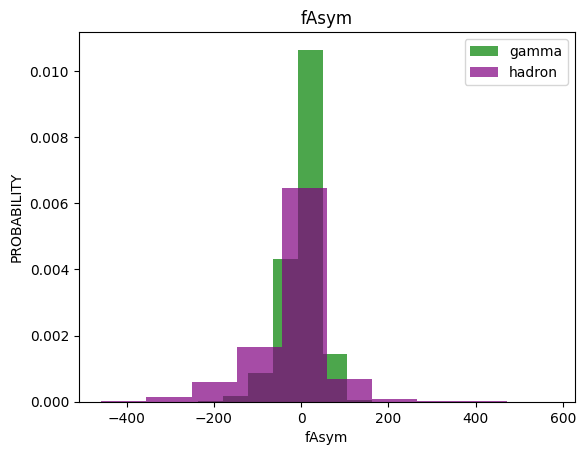

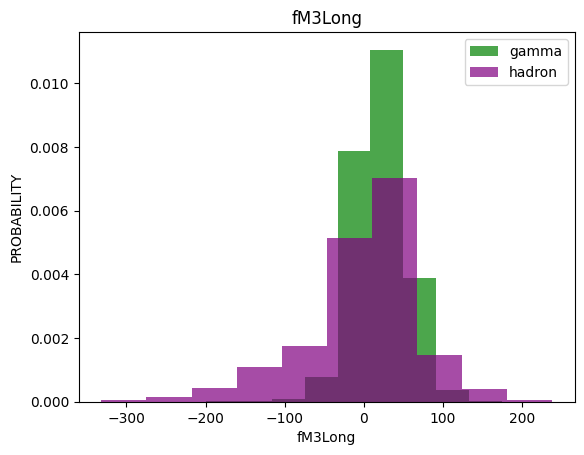

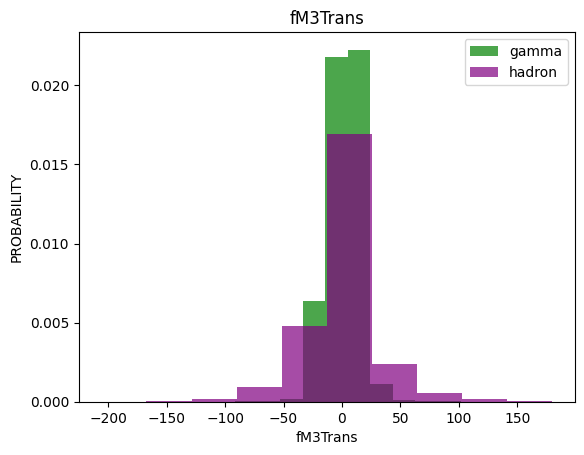

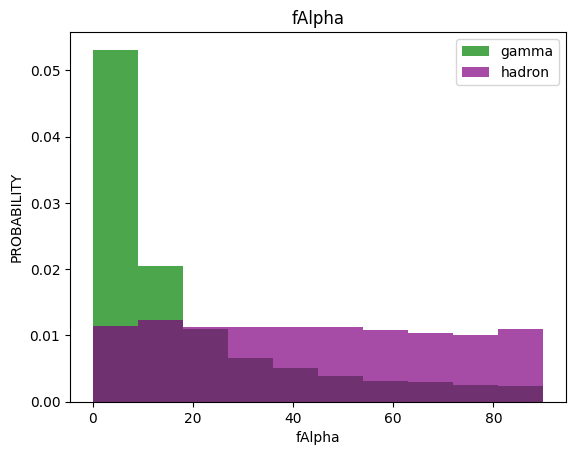

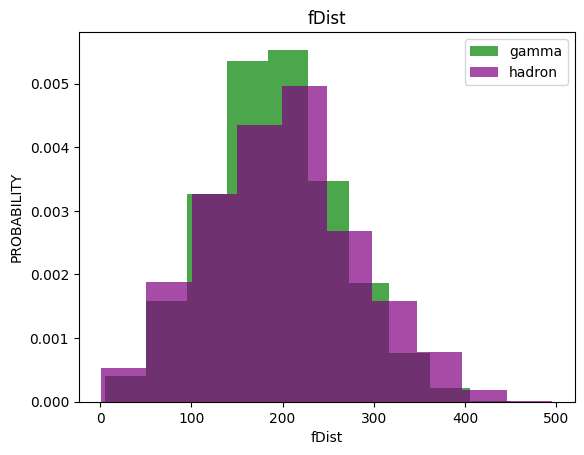

In [13]:
for label in cols[: -1]:
  plt.hist(df[df["class"] == 1][label], color="green", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color="purple", label="hadron", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("PROBABILITY")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation, Test Datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [66]:
def scale_datasets(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [67]:
train, x_train, y_train = scale_datasets(train, oversample=True)
valid, x_valid, y_valid = scale_datasets(valid, oversample=False)
test, x_test, y_test = scale_datasets(test, oversample=False)

#kNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [95]:
Knn_model = KNeighborsClassifier(n_neighbors=5)
Knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred = Knn_model.predict(x_test)

In [97]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1320
           1       0.86      0.85      0.86      2484

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [100]:
naive_model = GaussianNB()
nb_model = naive_model.fit(x_train, y_train)

In [101]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.39      0.50      1342
           1       0.73      0.91      0.81      2462

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.70      3804



#Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
log_model = LogisticRegression()
lg_model = log_model.fit(x_train, y_train)

In [104]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



#Support Vector Machine

In [106]:
from sklearn.svm import SVC

In [107]:
svm_model = SVC()
svm_model= svm_model.fit(x_train, y_train)

In [108]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1342
           1       0.89      0.89      0.89      2462

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Networks

In [109]:
import tensorflow as tf

In [121]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary-crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [115]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adamax(0.001), loss='binary_crossentropy',
                 metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
history = nn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_valid, y_valid), verbose=0)

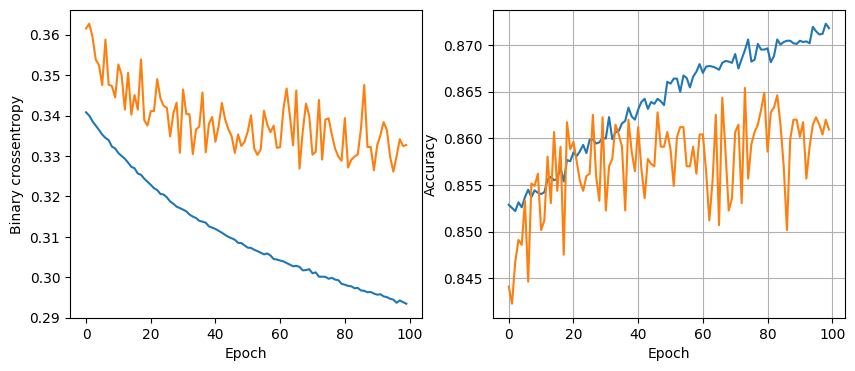

In [119]:
plot_history(history)

#Making it Trainning Function

In [120]:
def train_model(x_train, y_train, num_node, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_node, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_node, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adamax(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
      x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_valid, y_valid), verbose=0
      )
  return nn_model, history

Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


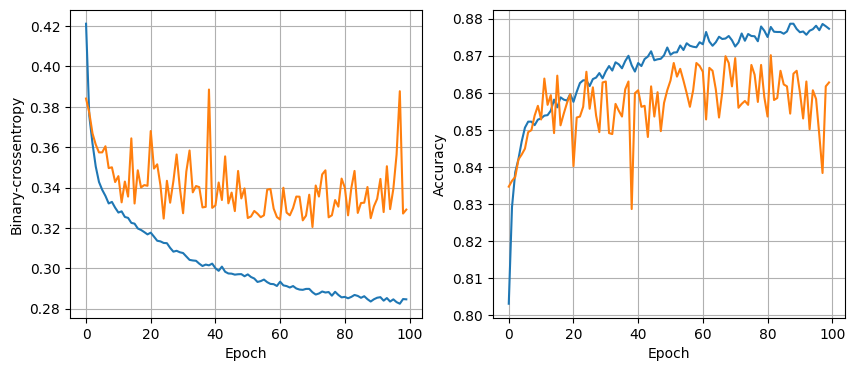

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8628 - loss: 0.3408
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 64


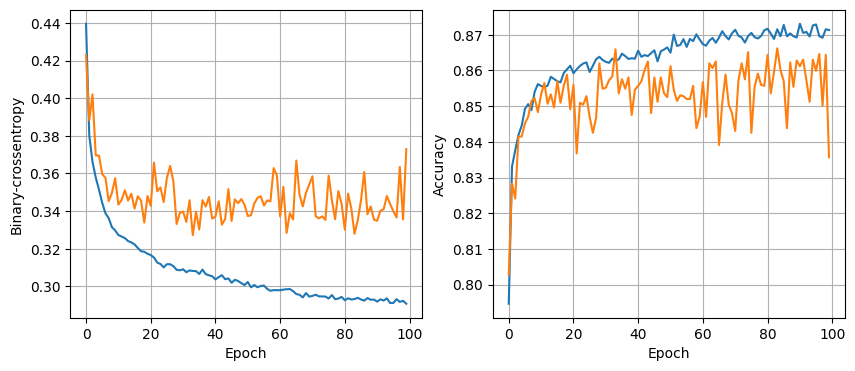

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8428 - loss: 0.3609
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 128


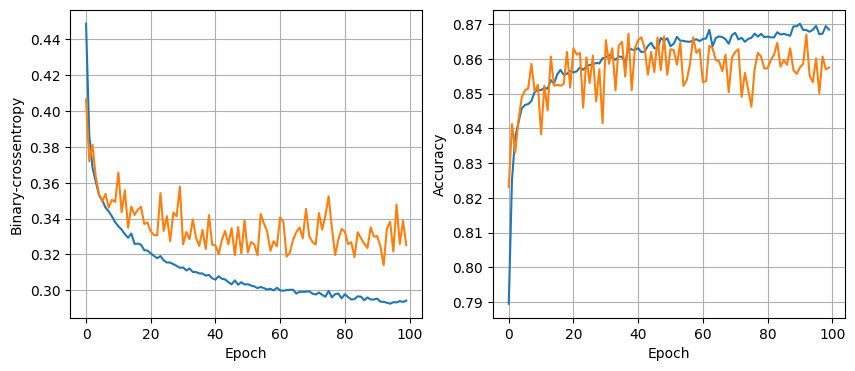

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.3176
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 32


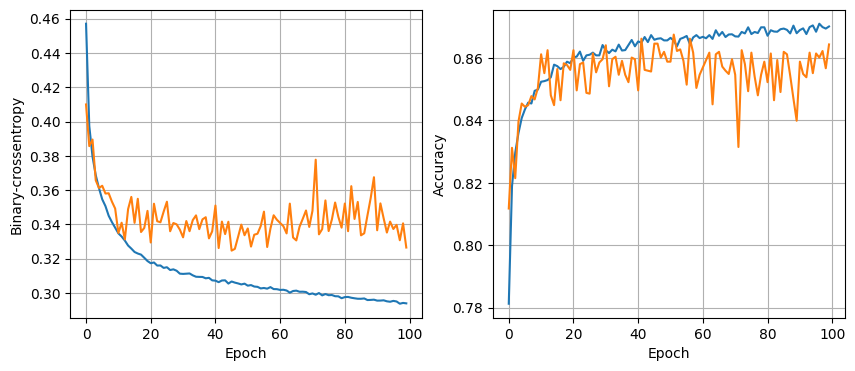

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8711 - loss: 0.3198
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 64


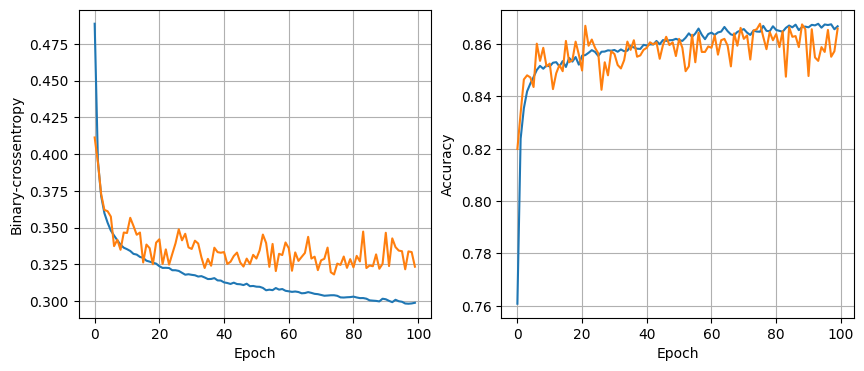

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681 - loss: 0.3161
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 128


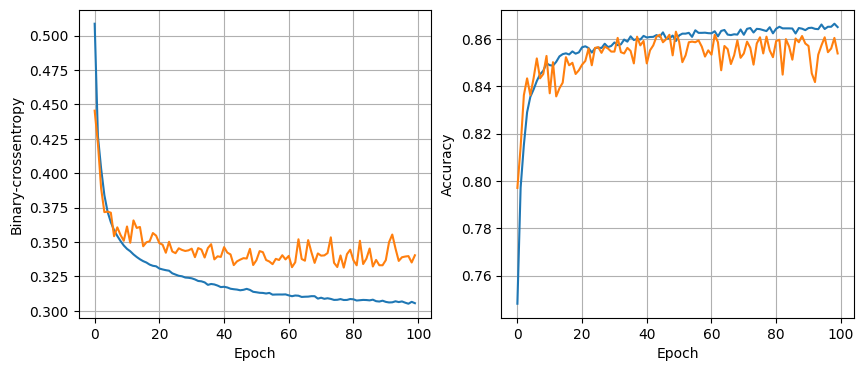

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8600 - loss: 0.3333
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 32


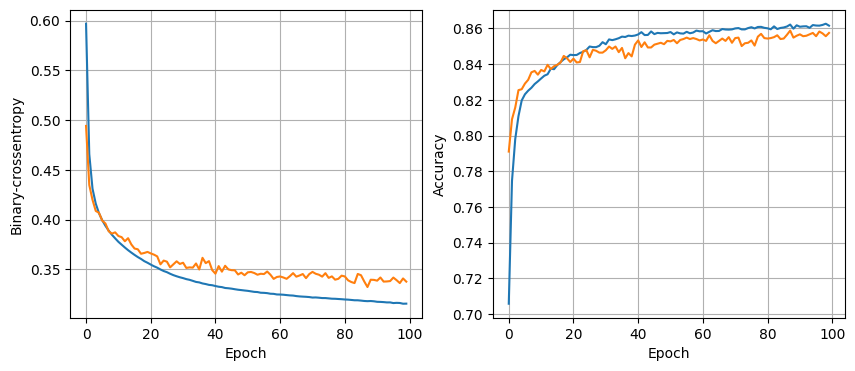

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.3281
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 64


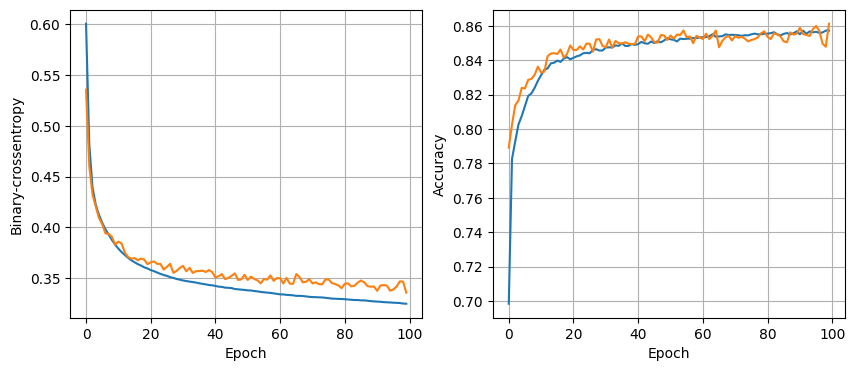

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8694 - loss: 0.3337
Training model with 16 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 128


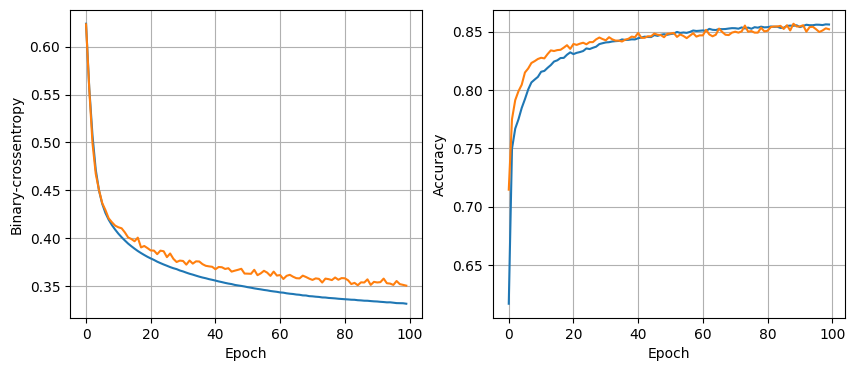

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8590 - loss: 0.3432
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 32


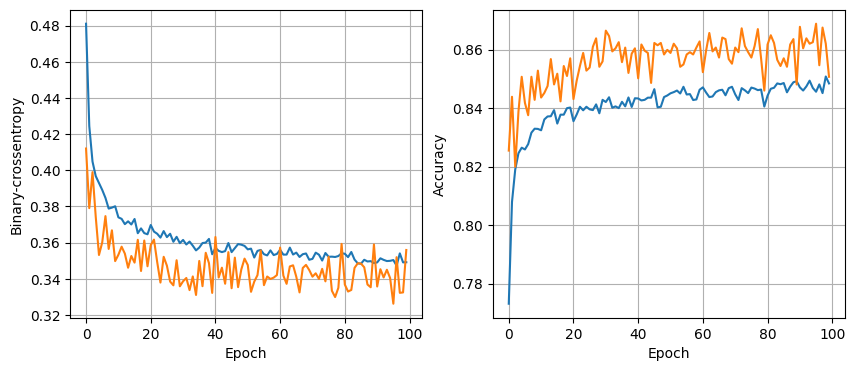

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8568 - loss: 0.3505
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 64


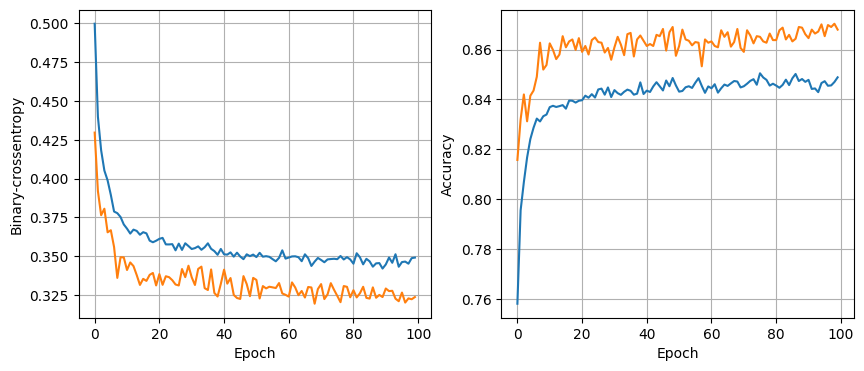

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8720 - loss: 0.3186
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 128


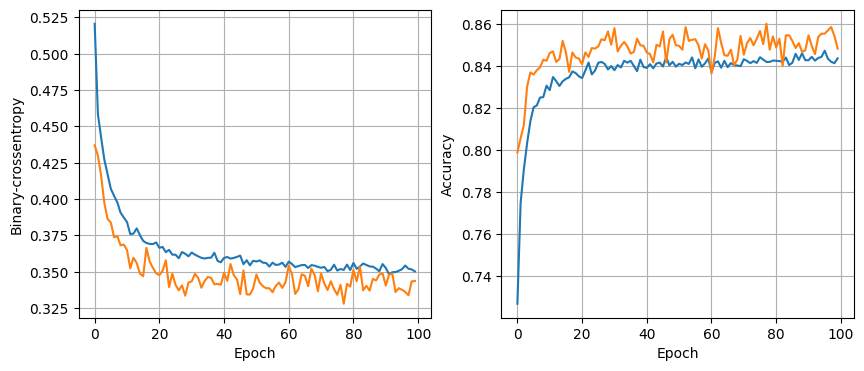

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3405
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 32


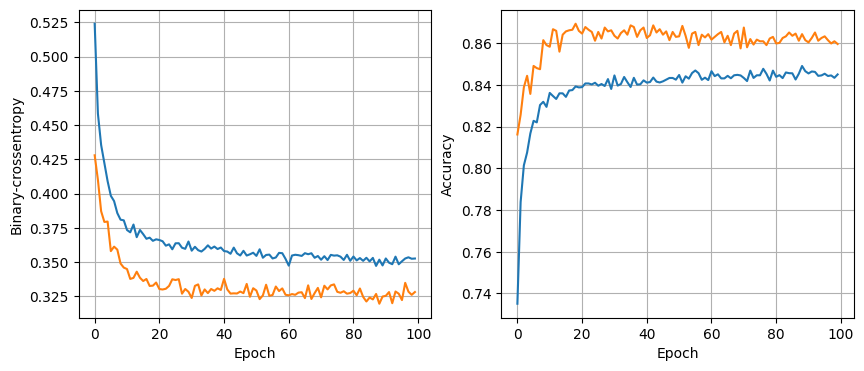

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.3241
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 64


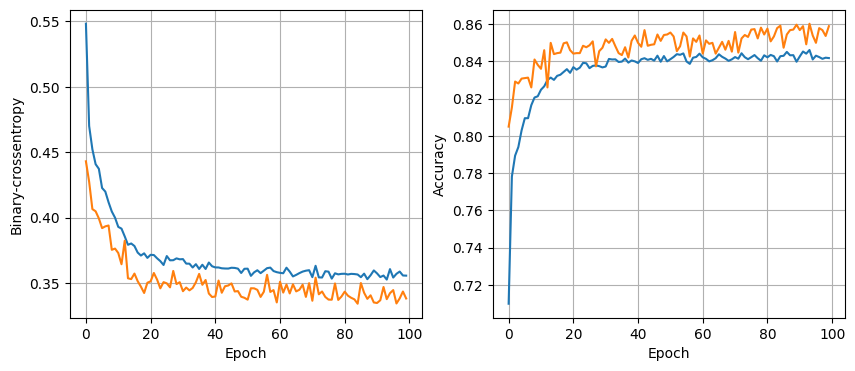

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.3319
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 128


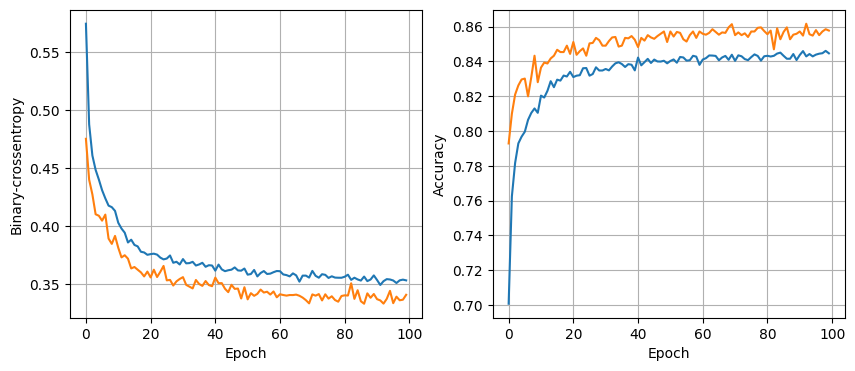

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.3341
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 32


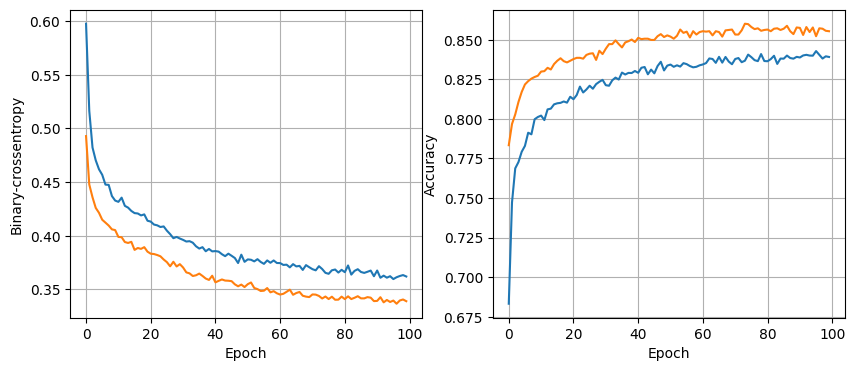

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3360
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 64


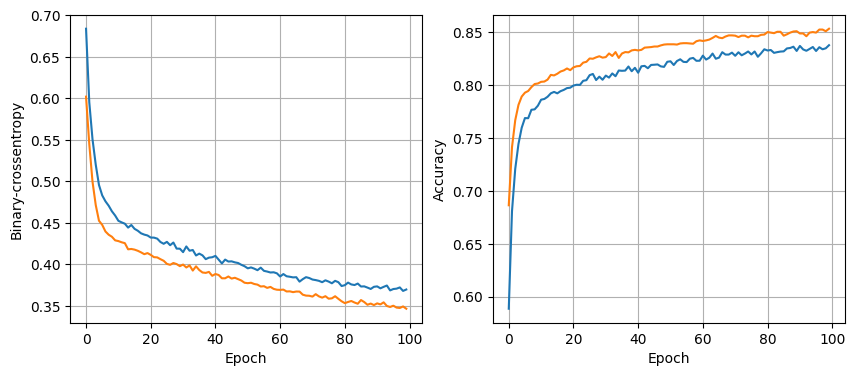

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8584 - loss: 0.3377
Training model with 16 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 128


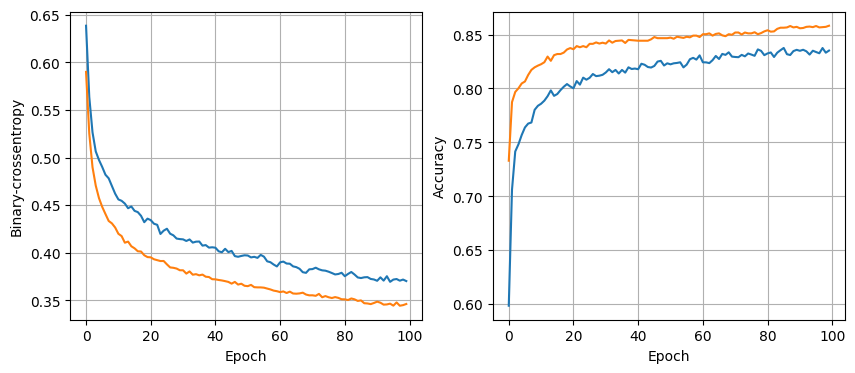

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3392
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 32


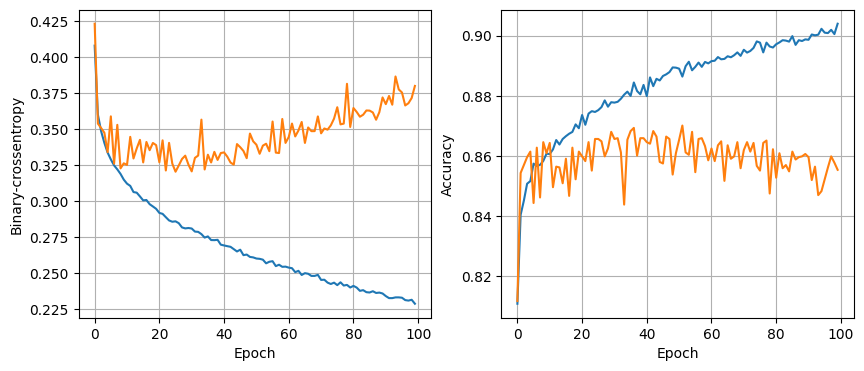

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8558 - loss: 0.3736
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 64


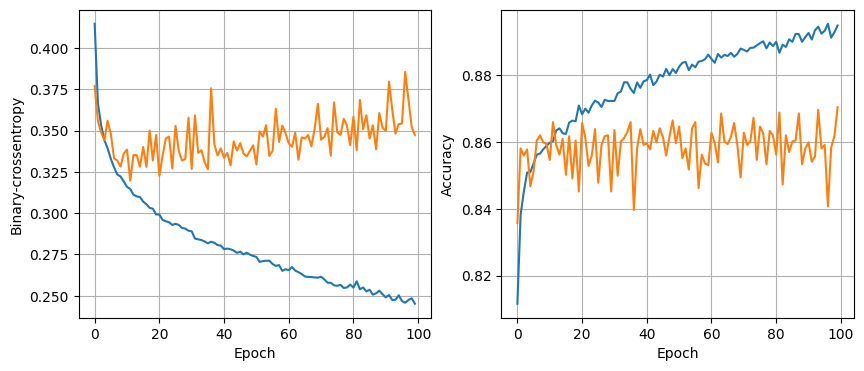

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8710 - loss: 0.3511
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 128


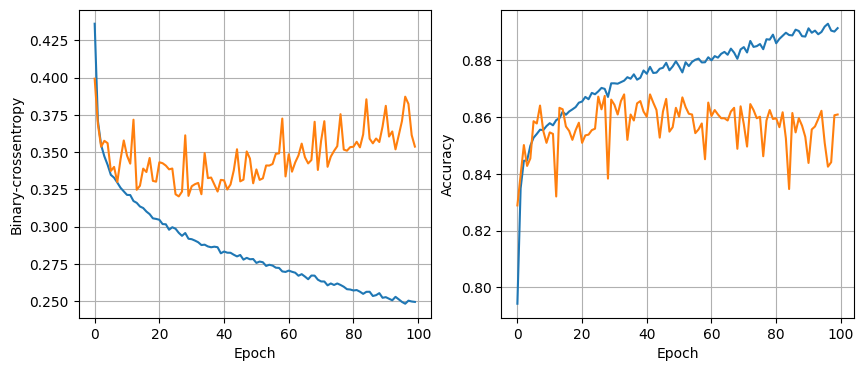

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3512
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 32


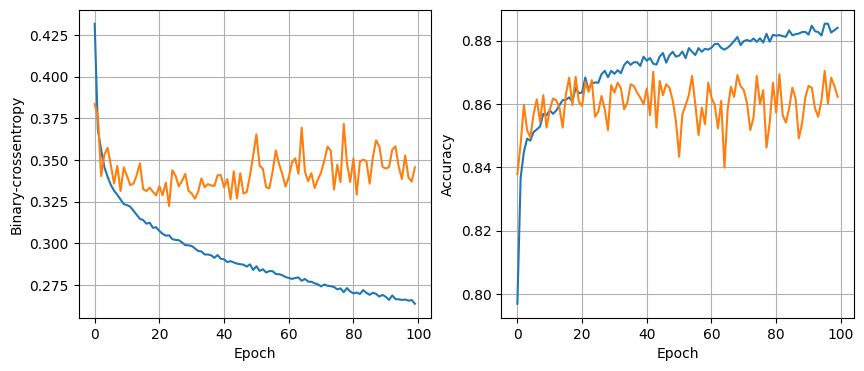

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8645 - loss: 0.3445
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 64


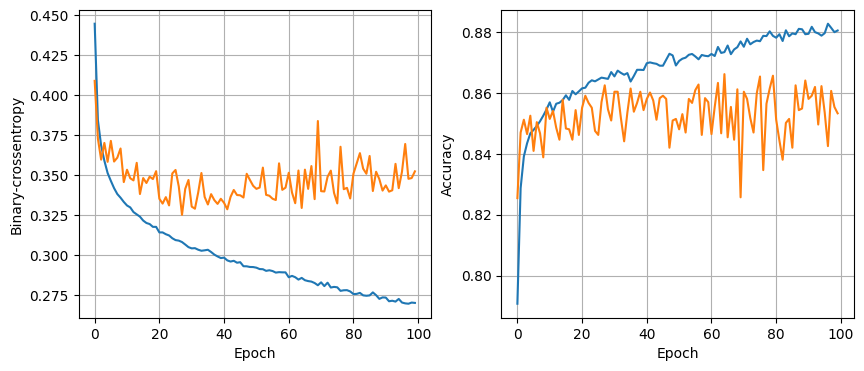

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8596 - loss: 0.3555
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 128


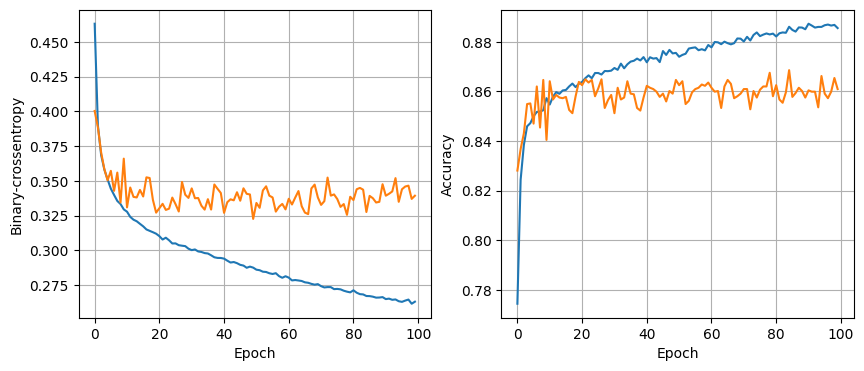

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3382
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 32


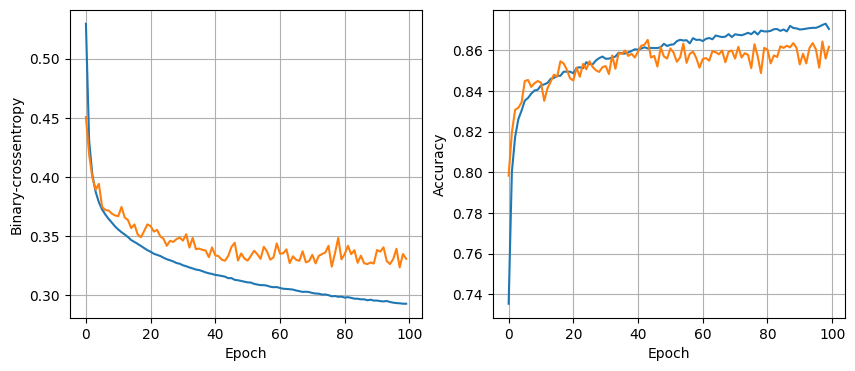

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8610 - loss: 0.3254
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 64


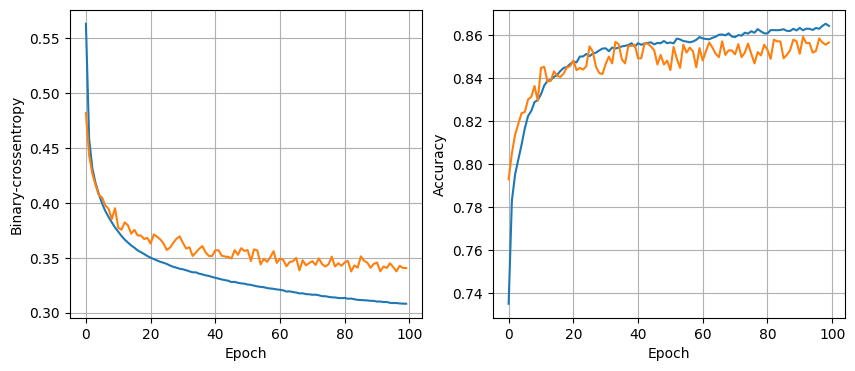

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.3380
Training model with 32 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 128


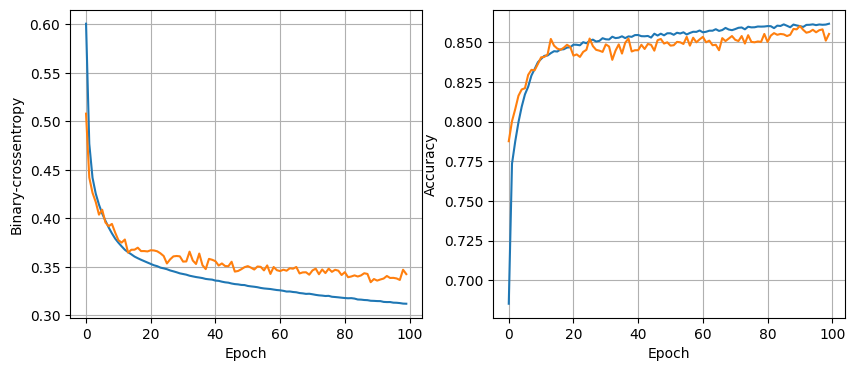

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.3368
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 32


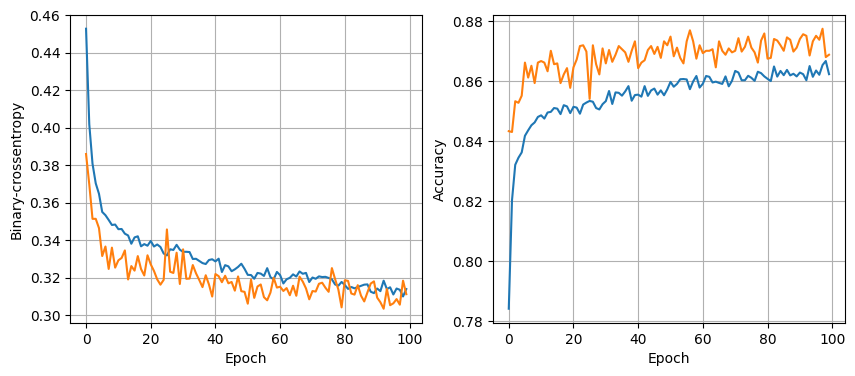

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8730 - loss: 0.3080
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 64


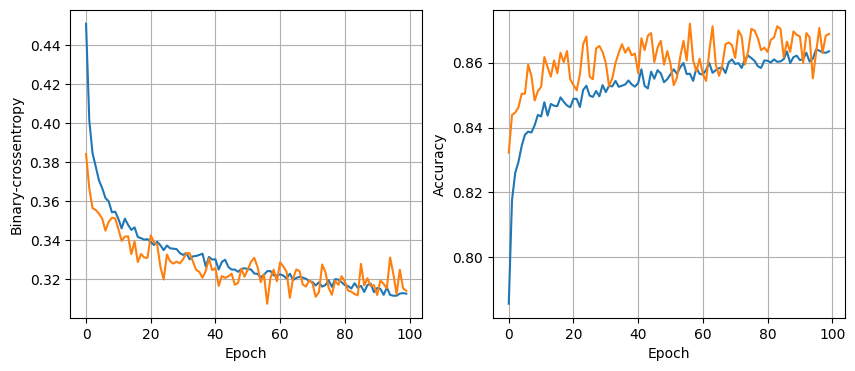

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3029
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 128


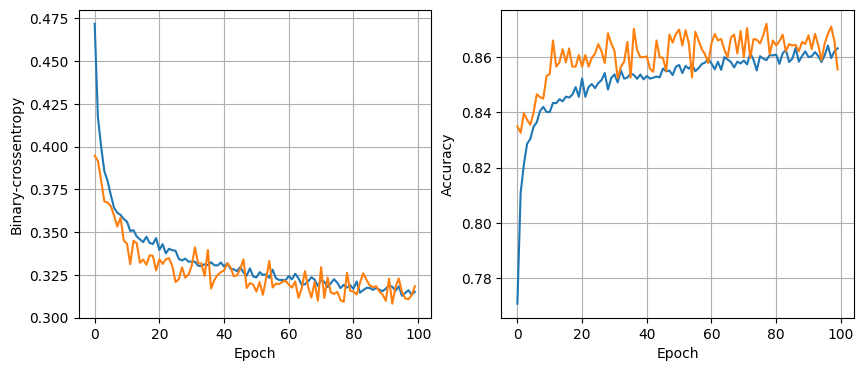

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8562 - loss: 0.3163
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 32


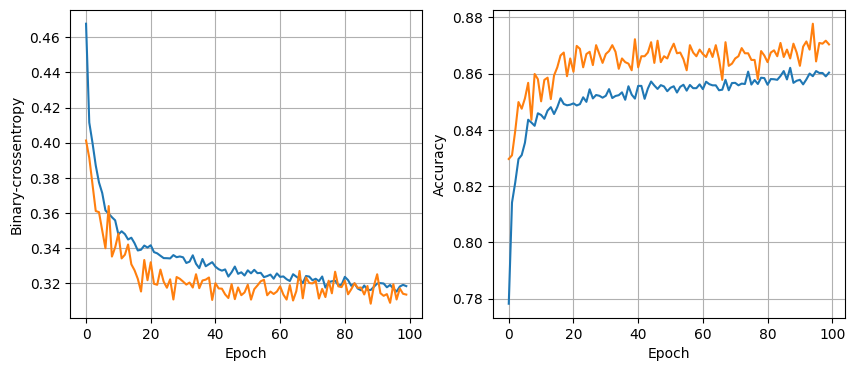

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8751 - loss: 0.3111
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 64


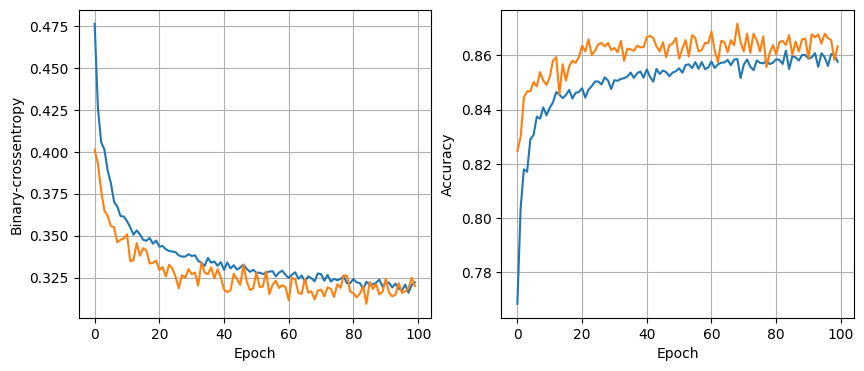

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3173
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 128


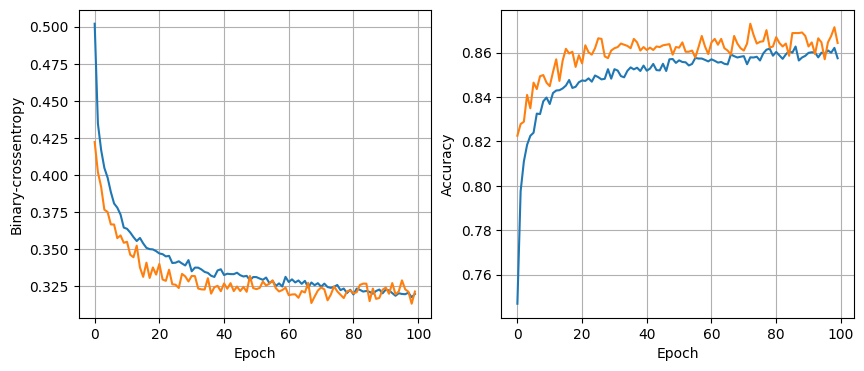

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8671 - loss: 0.3143
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 32


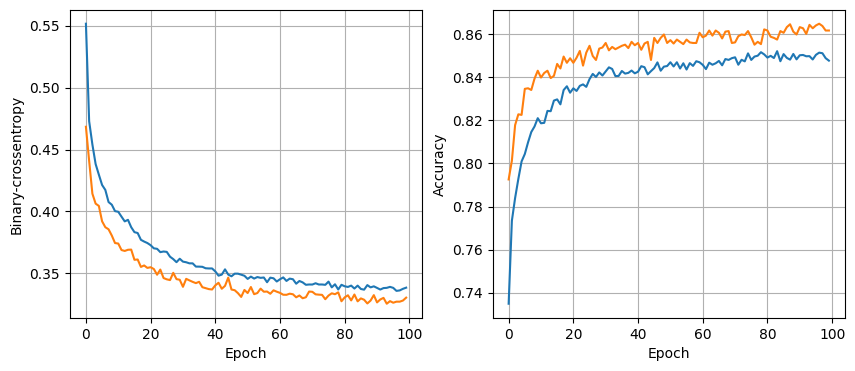

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.3272
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 64


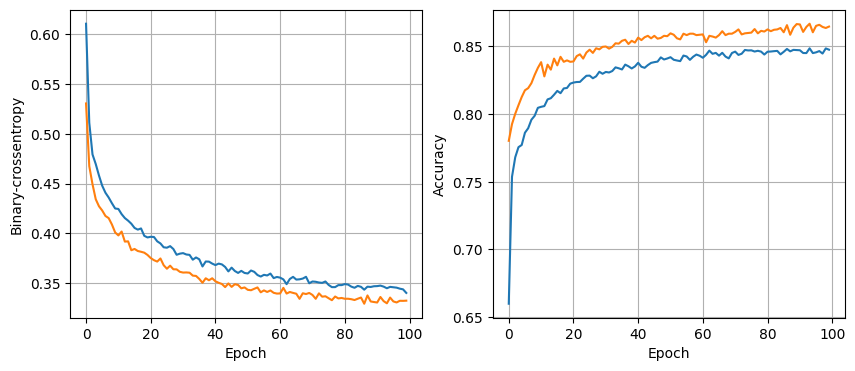

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.3256
Training model with 32 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 128


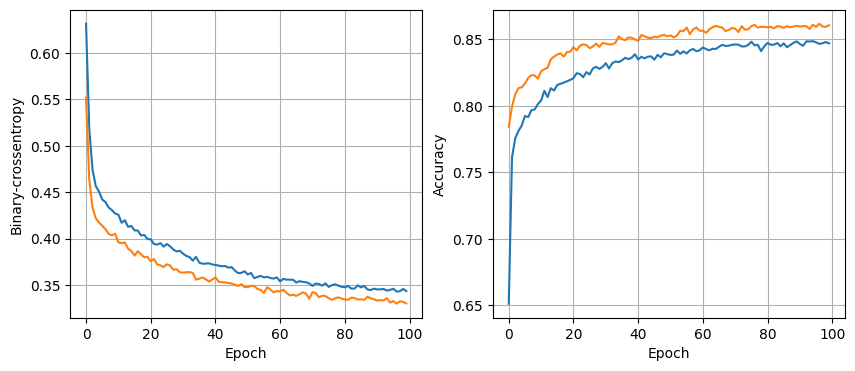

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8685 - loss: 0.3235
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 32


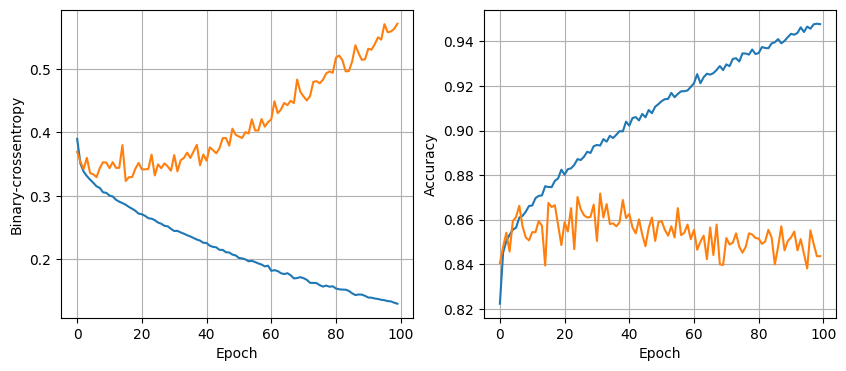

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8479 - loss: 0.5478
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 64


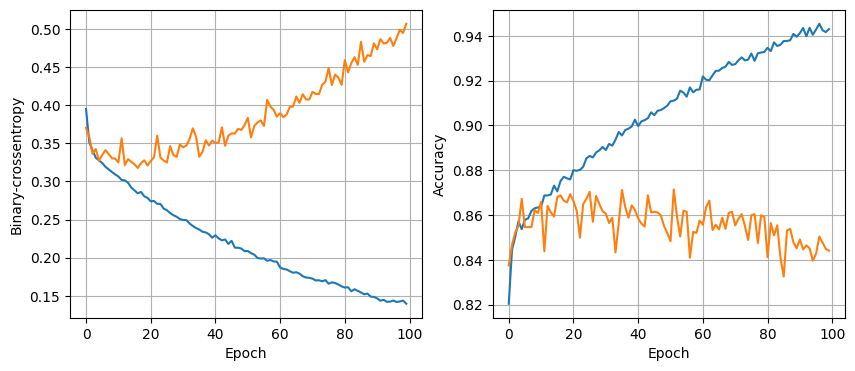

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8464 - loss: 0.5258
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.01 Batch Size 128


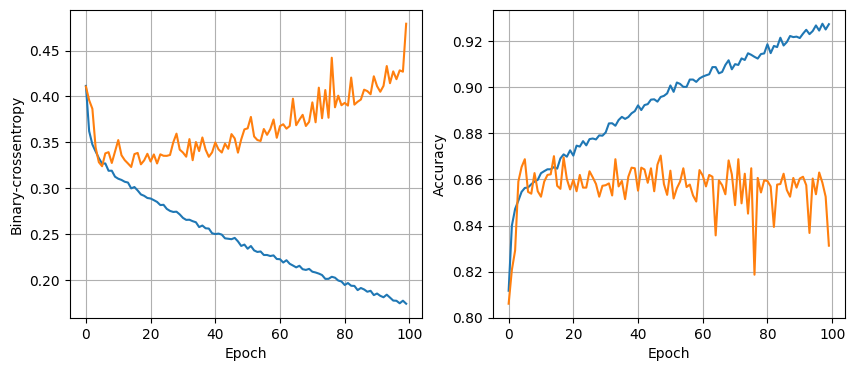

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8433 - loss: 0.4699
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 32


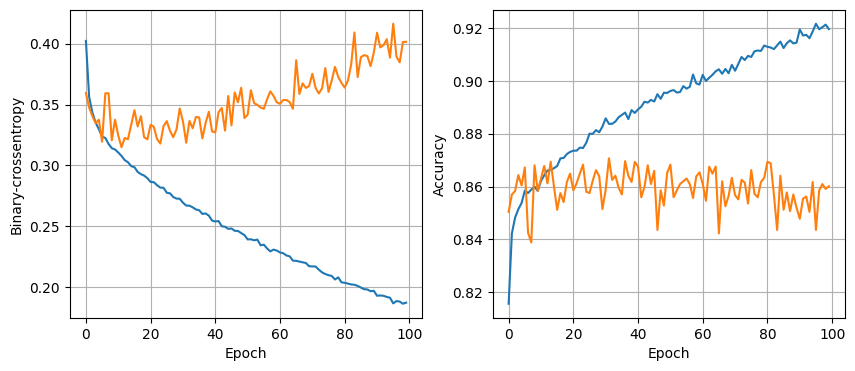

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.4106
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 64


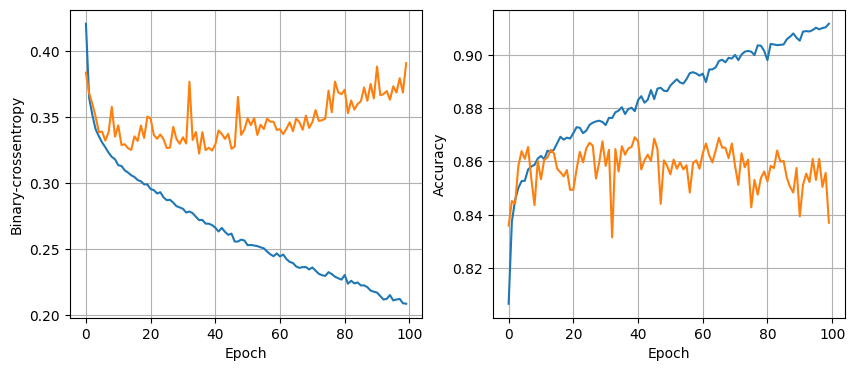

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 0.3944
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.005 Batch Size 128


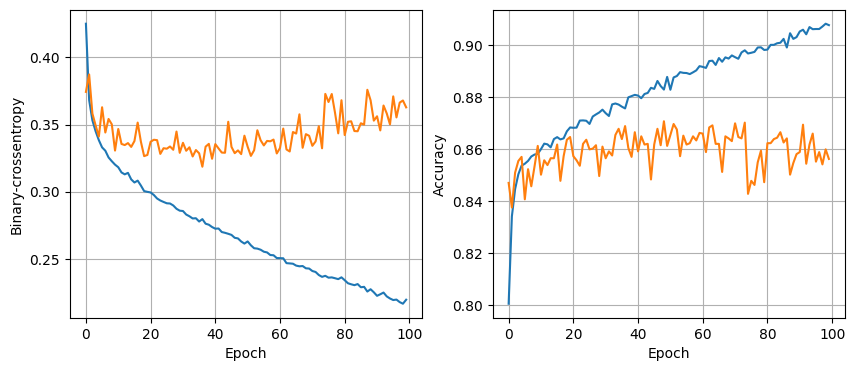

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3548
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 32


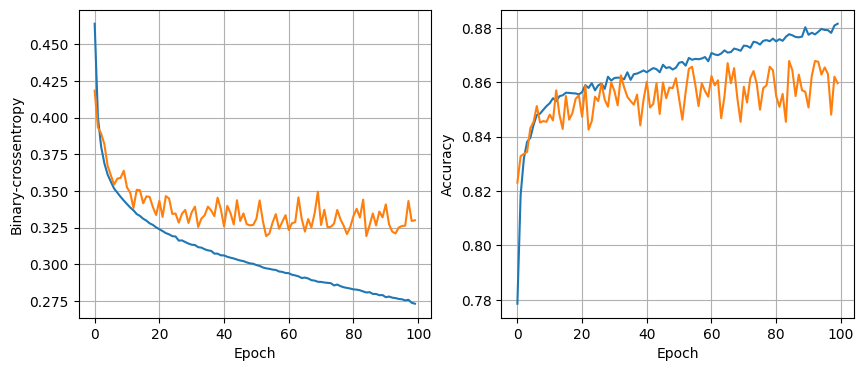

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3279
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 64


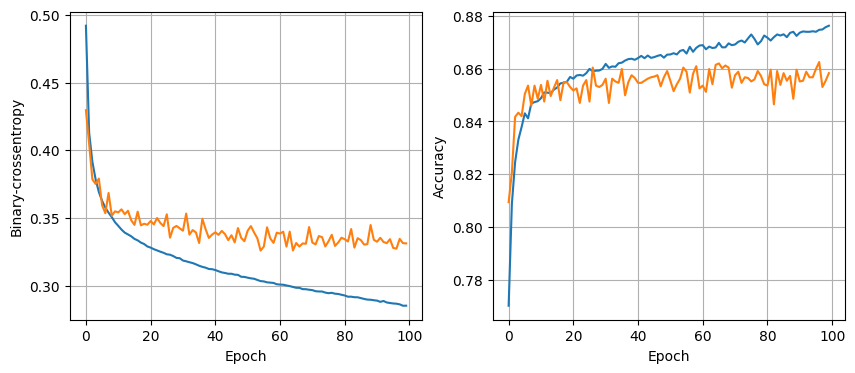

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3296
Training model with 64 nodes Dropout Probabilty 0 Learninh Rate 0.001 Batch Size 128


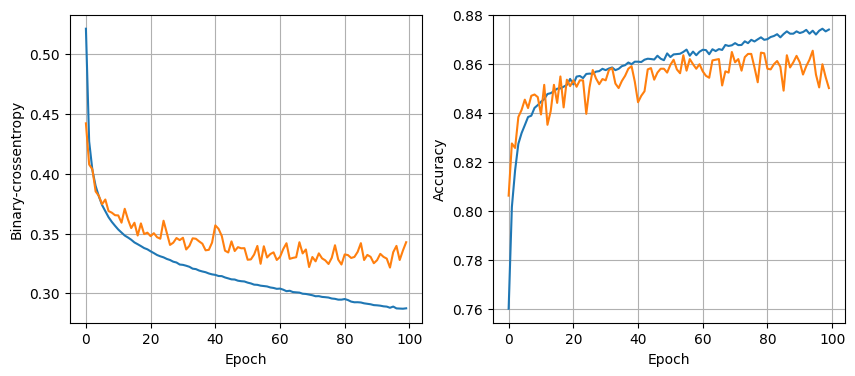

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3375
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 32


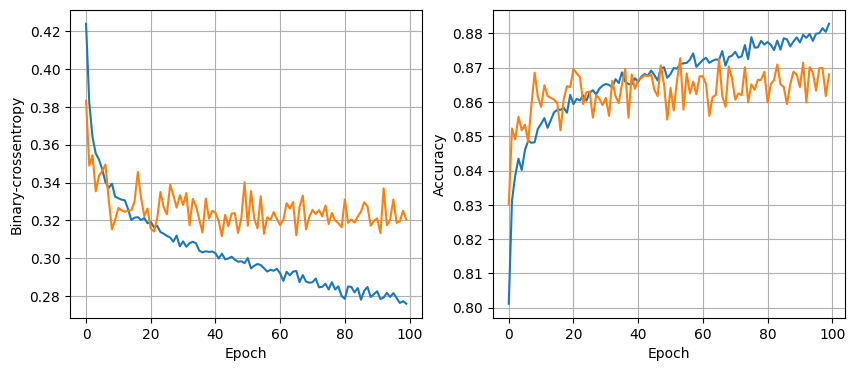

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8709 - loss: 0.3162
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 64


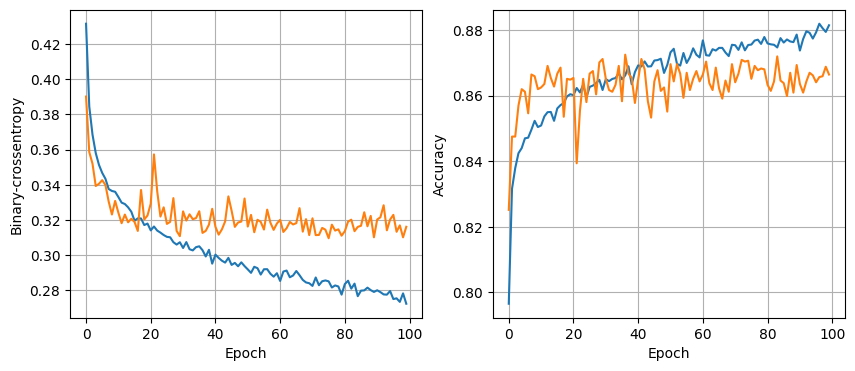

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3151
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.01 Batch Size 128


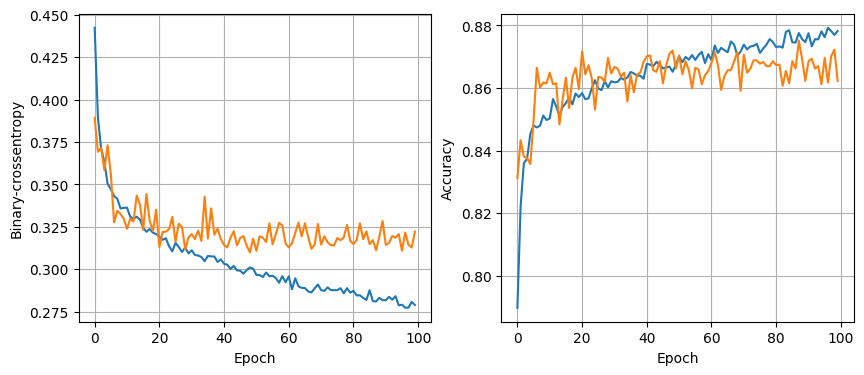

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3209
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 32


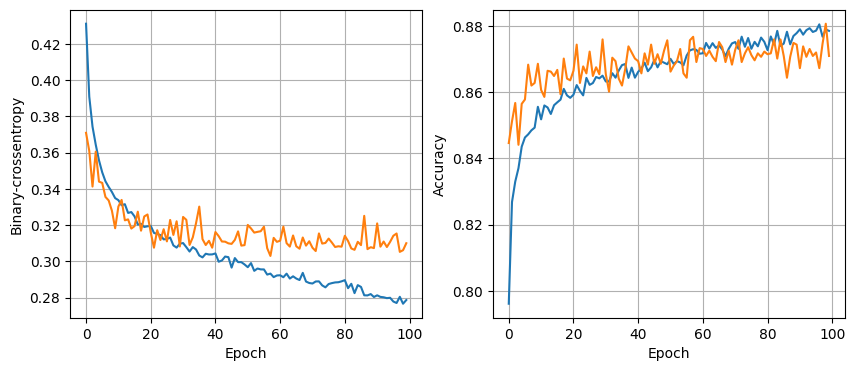

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8701 - loss: 0.3080
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 64


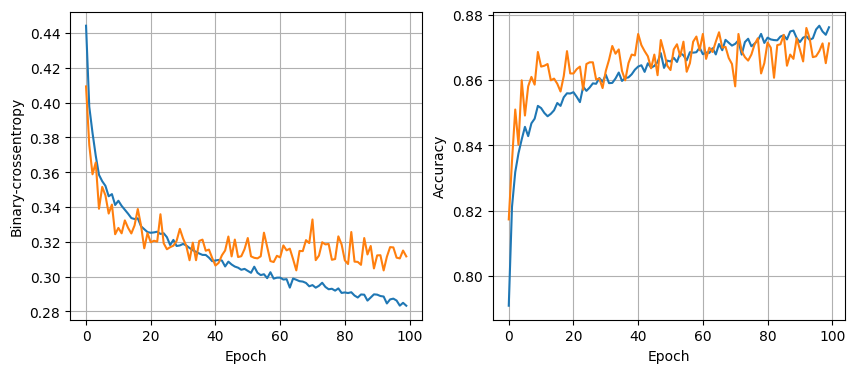

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8738 - loss: 0.3063
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.005 Batch Size 128


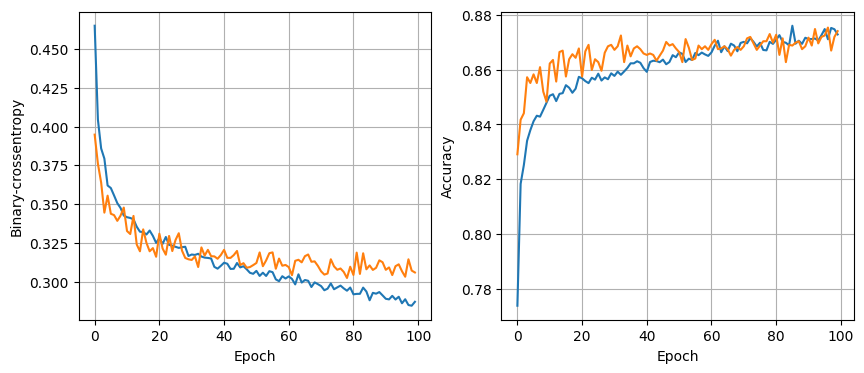

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8706 - loss: 0.3091
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 32


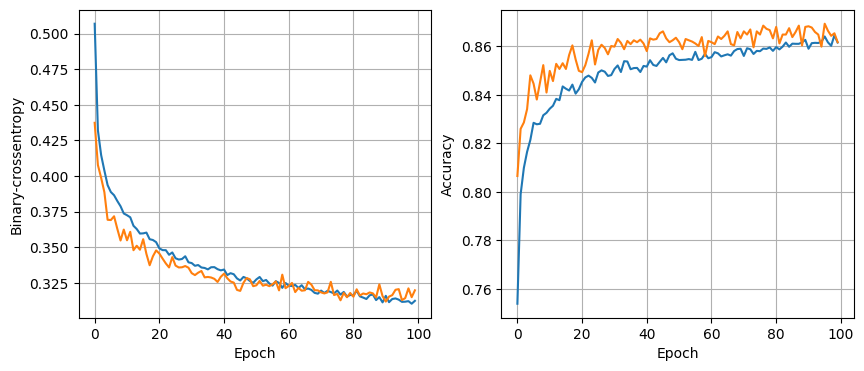

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3152
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 64


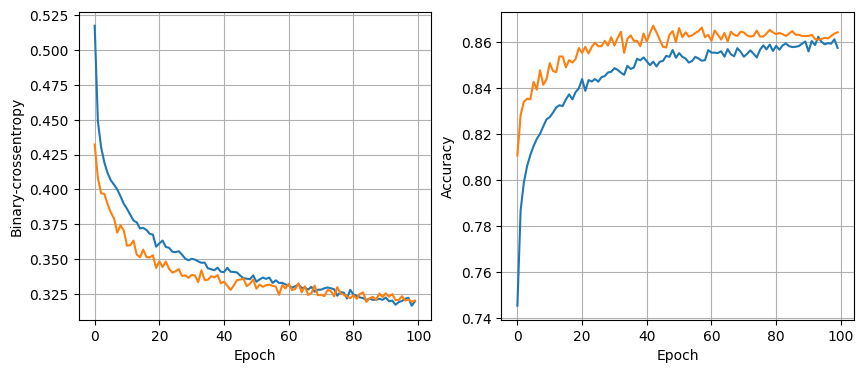

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3180
Training model with 64 nodes Dropout Probabilty 0.2 Learninh Rate 0.001 Batch Size 128


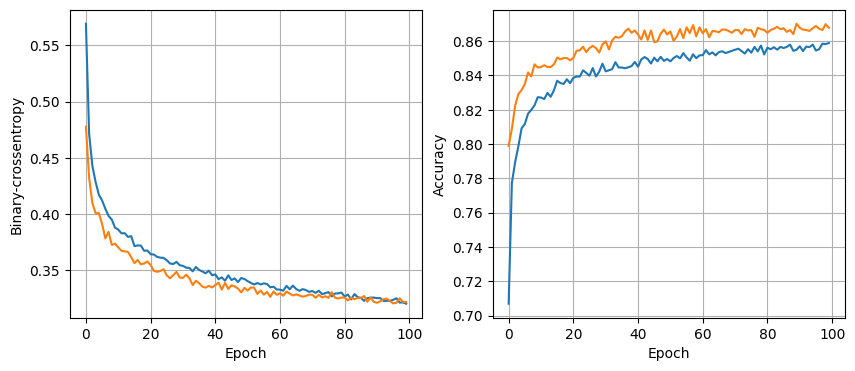

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8733 - loss: 0.3173


In [125]:
least_val_loss = float('inf')
least_loss_model = None

epochs=100
for num_node in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32,64,128]:
        print(f"Training model with {num_node} nodes Dropout Probabilty {dropout_prob} Learninh Rate {lr} Batch Size {batch_size}")
        model, history = train_model(x_train, y_train, num_node, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model